<a href="https://colab.research.google.com/github/imthiyazg/Datascience/blob/main/CNNsentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coursework Option C 

SET09822 - Artificial Intelligence 

Name: - Gulam Rasool Imthiyaz Ahmed 

Graduation ID: -  40518428@live.napier.ac.uk 

Pandas for data loding and importing keras model sequential and layers

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras import layers

mounting google drive to load the dataset

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


creating a path to each given dataset

In [ ]:
# set local path where notebooks and data folders are located
path = "/content/gdrive/My Drive/DW_data/"
data_path_train = path + "train.csv"
data_path_test= path+ "test.csv"
data_path_val= path+ "val.csv"
print(data_path_train)
print(data_path_test)
print (data_path_val)

/content/gdrive/My Drive/DW_data/train.csv
/content/gdrive/My Drive/DW_data/test.csv
/content/gdrive/My Drive/DW_data/val.csv


converting datasets to 2 column data frames

In [ ]:
#the data is saved as a dataframe with two column names: label and review
df_train = pd.read_csv(data_path_train, names=['review', 'label'])
df_test = pd.read_csv(data_path_test, names=['review', 'label'])
df_val = pd.read_csv(data_path_val, names=['review', 'label'])

In [ ]:
df_train

,review,label
0,note : some may consider portions of the follo...,1
1,note : some may consider portions of the follo...,1
2,every once in a while you see a film that is s...,1
3,"when i was growing up in 1970s , boys in my sc...",1
4,"the muppet movie is the first , and the best m...",1
...,...,...
1395,it's been hours since i returned from the much...,0
1396,i'm not sure who the genius is who came up wit...,0
1397,the classic story & the production which ruine...,0
1398,"according to popular film opinion , a film's g...",0


In [ ]:
df_val

,review,label
0,"if he doesn=92t watch out , mel gibson is in d...",1
1,"wong kar-wei's "" fallen angels "" is , on a pur...",1
2,there is nothing like american history x in th...,1
3,"an unhappy italian housewife , a lonely waiter...",1
4,"when people are talking about good old times ,...",1
...,...,...
195,"tri-star ; rated r ( language , sexual situati...",0
196,fact that charles bronson represents one of th...,0
197,"the above is dialogue from this film , taken a...",0
198,"in the interest of being generous , i want to ...",0


In [ ]:
df_test

,review,label
0,wild things is a suspenseful thriller starring...,1
1,"i know it already opened in december , but i f...",1
2,"what's shocking about "" carlito's way "" is how...",1
3,uncompromising french director robert bresson'...,1
4,"aggressive , bleak , and unrelenting film abou...",1
...,...,...
395,it's always a bad sign when the core audience ...,0
396,synopsis : cro-magnon ayla loses her mother to...,0
397,""" battlefield earth "" is the best comedy of t...",0
398,birthdays often cause individuals to access th...,0


appending train and val data sets in to one

In [ ]:
df=df_train.append(df_val)

In [ ]:
df

,review,label
0,note : some may consider portions of the follo...,1
1,note : some may consider portions of the follo...,1
2,every once in a while you see a film that is s...,1
3,"when i was growing up in 1970s , boys in my sc...",1
4,"the muppet movie is the first , and the best m...",1
...,...,...
195,"tri-star ; rated r ( language , sexual situati...",0
196,fact that charles bronson represents one of th...,0
197,"the above is dialogue from this film , taken a...",0
198,"in the interest of being generous , i want to ...",0


In [ ]:
print(df.iloc[0])

review    note : some may consider portions of the follo...
label                                                     1
Name: 0, dtype: object


Removing special characters from the text 

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
 df['review'] = df['review'].str.replace(char, ' ')

Removing double empty spaces from the text 

In [ ]:
df['review'] = df['review'].str.split().str.join(" ")

In [ ]:
# We store the reviews and labels in two arrays as follows:
reviews = df['review'].values
labels = df['label'].values

In [ ]:
reviews

array(['note some may consider portions of the following text to be spoilers be forewarned it s startling to consider that it was only a few years ago that film distributors would worriedly rearrange their summer release schedules in order to give the annual disney animated feature juggernaut a wide berth the lion king had just cracked $300 million domestic in gross to become one of the most profitable ventures in film history continuing to build on a sturdy base left by prior flicks aladdin and beauty and the beast since then though disney s animated features have shown an unbroken string of diminishing returns with pocahontas the hunchback of notre dame and this year s hercules successively proving less and less potent with the once seemingly impregnable disney stranglehold on the market share suddenly looking mighty vulnerable and faced with their first serious competition in the animated film market from fox s anastasia disney has brought xmas home early by dusting off the feature 

In [ ]:
labels

array([1, 1, 1, ..., 0, 0, 0])

Split data for testing and validation

In [ ]:
from sklearn.model_selection import train_test_split

reviews_train, reviews_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.22)

Using tokenizer karas API for word embeddings

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
#defining the tokenizer
tokenizer = Tokenizer(num_words=3000) # num_words most  frequent words is returned

#perform tokenisation only on the training data!
tokenizer.fit_on_texts(reviews_train)

X_train = tokenizer.texts_to_sequences(reviews_train)
X_test = tokenizer.texts_to_sequences(reviews_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(reviews_train[0])
print(X_train[0])
vocab_size

traffic violation dr daniel s review of u turn dr d s rating critical condition okay here s the deal i ll be the first one to grant that everybody needs a day off now and then i ll even go so far as to say that a vacation is a necessary part of doing any job well i mean hey i ve been known to stretch a weekend into a three day outing if friday looks to be a slow day and if monday ain t looking like a pick me up well i ve been known to give martha nell a call and say do me a favor sweetheart bump old man ferguson s boil lancing to tuesday morning and tell miss audrey that i ll swing by her house monday evening and see if we can t get her trick knee back in line a simple sentence like that and i ve got a nice four day fishing trip with the boys or more often than not a trip up to cherokee n c for jackpot bingo and assorted other mountain funnery but the point is if you take a day off do something different if you ve worked yourself silly for months relax a bit sleep in eat pancakes at no

32621

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_test

array([[ 487,   72,   70, ...,    9,   73,   87],
       [ 301,   59,   43, ...,    5,  136,    7],
       [ 389,  145,   23, ...,  101,   74,  105],
       ...,
       [ 642,    5,    1, ...,    7,    1,  157],
       [   5,    2, 1573, ...,   25,  172, 1053],
       [  56,   10,    8, ...,    1,  436,  493]], dtype=int32)

defining CNN sequential model

In [ ]:
def cnn_text_classifier():
    embedding_dim = 50

    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen)) 
    model.add(layers.Conv1D(128, 5, activation='relu')) 
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model
    

Training the Model 

In [ ]:
model = cnn_text_classifier()
training = model.fit(X_train, y_train, epochs=50, verbose=False, validation_data=(X_test, y_test), batch_size=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            1631050   
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           32128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,664,479
Trainable params: 1,664,479
Non-trainable params: 0
______________________________________________

In [ ]:
history


Evaluating the model 

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9992
Testing Accuracy:  0.6705


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(training):
    acc = training.history['accuracy']
    val_acc = training.history['val_accuracy']
    loss = training.history['loss']
    val_loss = training.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 2)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


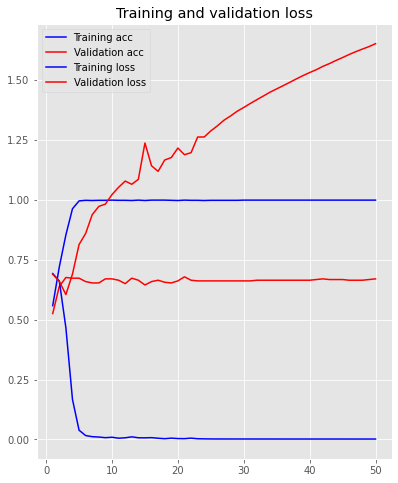

In [ ]:
plot_history(training)

In [ ]:
# We store the reviews and labels in two arrays as follows:
x = df_test['review'].values
y = df_test['label'].values

In [ ]:
x

In [ ]:
y

In [ ]:
df_test.shape

(400, 2)

In [ ]:
tokenizer1 = Tokenizer(num_words=3000) # num_words most  frequent words is returned


tokenizer.fit_on_texts(x)


xt = tokenizer.texts_to_sequences(x)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
print(xt[0])
print(xt[0])
vocab_size

[591, 177, 6, 2, 2194, 559, 774, 1673, 2933, 2906, 3, 1732, 8, 1986, 12, 37, 1, 1320, 287, 130, 574, 3, 1, 1061, 4, 1, 16, 6, 2, 347, 408, 1140, 9, 2854, 4, 116, 3, 3, 20, 1, 72, 365, 764, 22, 1, 313, 1, 16, 828, 53, 145, 1, 548, 4, 2, 31, 1, 2651, 229, 328, 9, 6, 126, 8, 56, 657, 37, 4, 1, 1903, 82, 329, 706, 571, 1824, 3, 488, 1247, 3, 1, 656, 363, 1328, 625, 587, 56, 81, 83, 8, 37, 4, 1, 577, 21, 12, 1, 2959, 17, 560, 45, 61, 1328, 440, 1, 81, 4, 1, 16, 56, 83, 94, 230, 1328, 66, 127, 5, 76, 706, 324, 52, 57, 4, 2867, 84, 88, 8, 706, 36, 10, 78, 15, 287, 316, 2866, 5, 515, 31, 193, 324, 706, 6, 221, 1, 1328, 285, 2, 4, 94, 706, 36, 142, 9, 6, 378, 2206, 22, 8, 706, 106, 359, 4, 1, 577, 9, 33, 37, 2, 821, 381, 1, 84, 706, 6, 316, 706, 2, 80, 1042, 4, 1377, 7, 508, 13, 57, 27, 5, 36, 9, 6, 104, 2206, 8, 706, 1328, 3, 123, 37, 7, 20, 9, 258, 9, 6, 126, 8, 1, 16, 448, 5, 1959, 53, 28, 6, 113, 1655, 12, 200, 72, 3, 28, 34, 49, 179, 1701, 1673, 2933, 333, 10, 706, 706, 6, 1, 252, 4, 210, 

37933

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
xt1 = pad_sequences(xt, padding='post', maxlen=maxlen)

In [ ]:
xt1

array([[  25, 2340,  559, ..., 1258,    4, 1321],
       [   2,  679,    1, ...,   22,  876,   16],
       [  42,   17,   46, ...,   27,  234,  188],
       ...,
       [   5,  371,    9, ...,  107,   26,  205],
       [   4,    1,  533, ...,  446, 1882,  257],
       [   8,    4,    1, ...,   42,    9, 1143]], dtype=int32)

In [ ]:
predictions = model.predict(xt1, batch_size=10)

In [ ]:
 predictions

In [ ]:
loss, accuracy = model.evaluate(xt1, y, verbose=False)
print("Testing Accuracy with new fresh data:  {:.4f}".format(accuracy))

Testing Accuracy with new fresh data:  0.5525
